In [ ]:
from google.colab import drive

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hrdata.csv to hrdata (1).csv


###**1. 데이터분석**

**1) 데이터 분석 목표**

데이터 분석에 앞서 목표를 먼저 언급하고자 합니다.
본 분석에서는 회사 내에서 직원들의 퇴직을 촉발시키는 주요 요인을 파악하는 것이 주요 목표입니다.

종속변수는 퇴직여부를 나태내는 attrition로 설정하고 독립변수들은 퇴직과 관련성이 높아보이는 '집과의 거리(DistanceFromHome)', '월소득(MonthlyIncome)', '업무환경에 대한 만족도(EnvironmentSatisfaction)', '업무성과(PerformanceRating)' 를 중심으로 분석하였습니다.

본격적인 데이터분석에 앞서 전체 데이터를 불러와 확인 및 정제하는 과정을 수행하였습니다.

**(1) 데이터 확인**

분석 데이터는 object 9개와 나머지는 int64로 구성되어 있습니다.
object는 문자열 혹은 혼합데이터를 의미하며 종속변수인 퇴직여부(Attrition)가 해당되었습니다.
int64는 정수 데이터를 의미하며 독립변수인 집과의 거리(DistanceFromHome)', '월소득(MonthlyIncome)', '업무환경에 대한 만족도(EnvironmentSatisfaction)', '업무성과(PerformanceRating)'가 모두 해당되었습니다.

In [ ]:
import pandas as pd
df=pd.read_csv('hrdata.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

**(2) 데이터 정제**

중복행, 결측치를 확인하는 과정을 가졌습니다.

데이터셋은 1470개의 행과 35개의 열로 구성되어 있으며, 중복된 행은 없었습니다.

또한 숫자가 다른 변수가 존재하지 않아 결측치도 없는 것으로 확인할 수 있었습니다.

In [ ]:
df.shape

(1470, 35)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 35)


In [ ]:
df = df.drop_duplicates()
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
pd.set_option('display.max_columns', None)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

**(3) 변수분포 확인**

종속변수인 퇴직여부에 관해 분석을 위해 일정 구간의 변수빈도를 한눈에 쉽게 파악할 수 있는 히스토그램을 이용하였습니다.
히스토그램을 이용하여 분석한 결과 총 데이터셋 인원 1,470명 중 현재 회사에서 퇴직을 한 인원수('yes')는 237명, 퇴직하지 않은 인원('No')은 1,233명이었습니다.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Attrition', ylabel='count'>

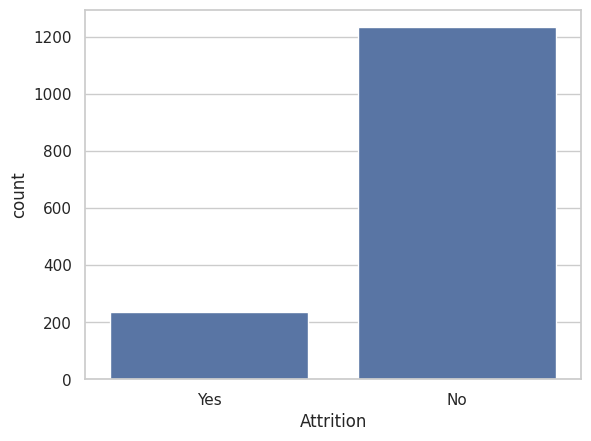

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x="Attrition", data=df)

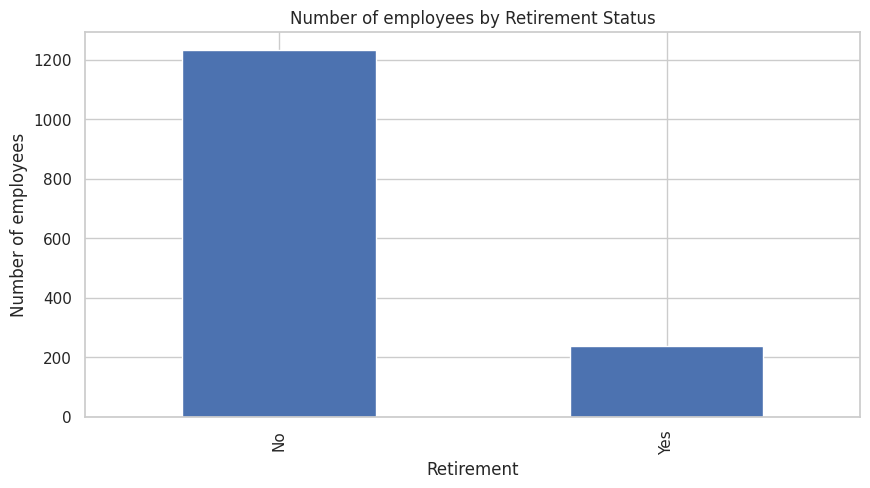

In [ ]:
df.Attrition.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of employees by Retirement Status")
plt.ylabel('Number of employees')
plt.xlabel('Retirement');
plt.show()

In [ ]:
df_no = df[(df['Attrition'] == 'No')]
len(df_no)

1233

In [ ]:
df_yes = df[(df['Attrition'] == 'Yes')]
len(df_yes)

237

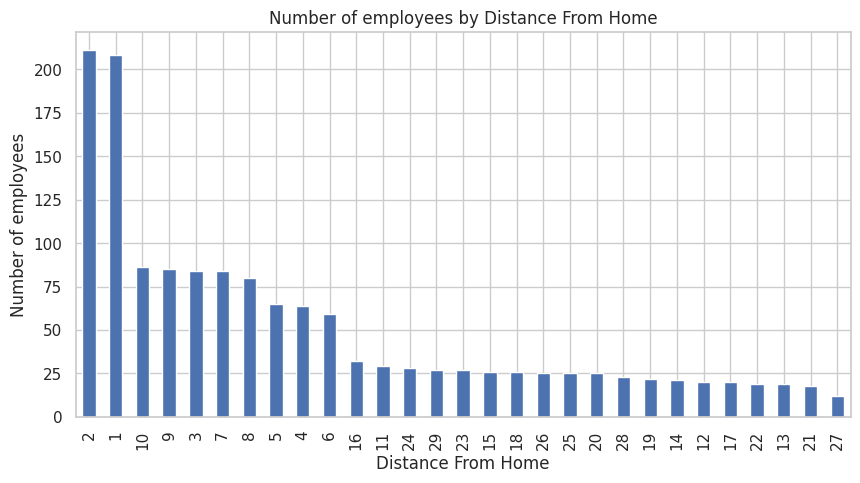

In [ ]:
df.DistanceFromHome.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of employees by Distance From Home")
plt.ylabel('Number of employees')
plt.xlabel('Distance From Home')
plt.show()

<ipython-input-102-bc2b0ff9f63c>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='DistanceFromHome', y='Attrition', orient='h', errwidth=0, data=df)


<Axes: xlabel='DistanceFromHome', ylabel='Attrition'>

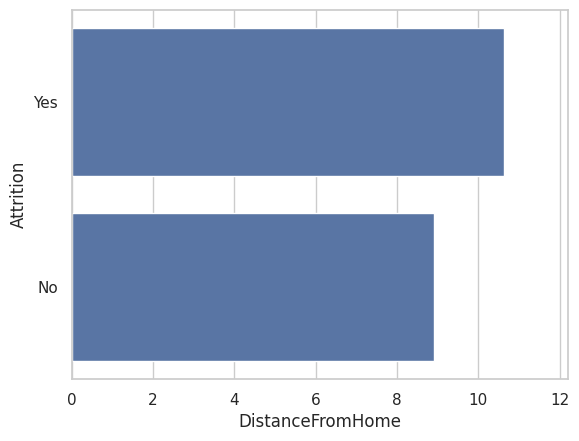

In [ ]:
sns.barplot(x='DistanceFromHome', y='Attrition', orient='h', errwidth=0, data=df)

일반 바 그래프로 집에서의 거리를 전체인원으로 비교하였을 때 보통 1,2km 인 사람들이 많았습니다. 또한 퇴사여부로 비교하였을 때 퇴직한 사람들이 약 2km 정도 차이가 나서 출퇴근 거리가 퇴직에 영향을 준 것으로 보입니다.

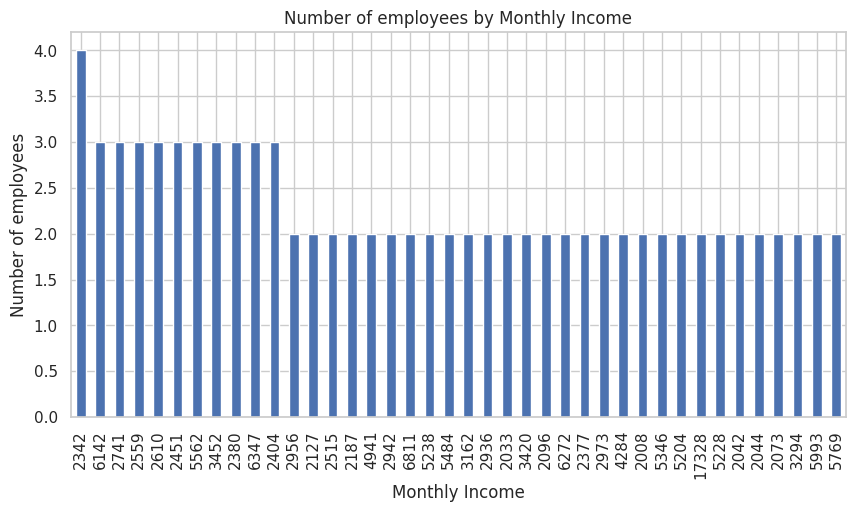

In [ ]:
df.MonthlyIncome.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of employees by Monthly Income")
plt.ylabel('Number of employees')
plt.xlabel('Monthly Income')
plt.show()

<ipython-input-123-d43bfe48a55c>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='MonthlyIncome', y='Attrition', orient='h', errwidth=0, data=df)


<Axes: xlabel='MonthlyIncome', ylabel='Attrition'>

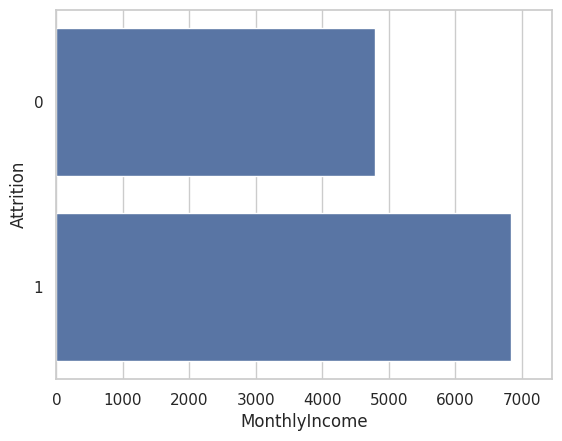

In [ ]:
sns.barplot(x='MonthlyIncome', y='Attrition', orient='h', errwidth=0, data=df)

월소득을 일반 바그래프로 비교하면 인원수가 많아 요약된 가로형 막대그래프로 퇴직 여부를 비교하였습니다. 비교한 결과 퇴직한 인원보다 퇴직을 하지 않은 직원의 월소득이 높았으며, 월약 2,000달러 차이가 났습니다. 월소득이 퇴직여부에 상당한 영향을 미친 것으로 보입니다.

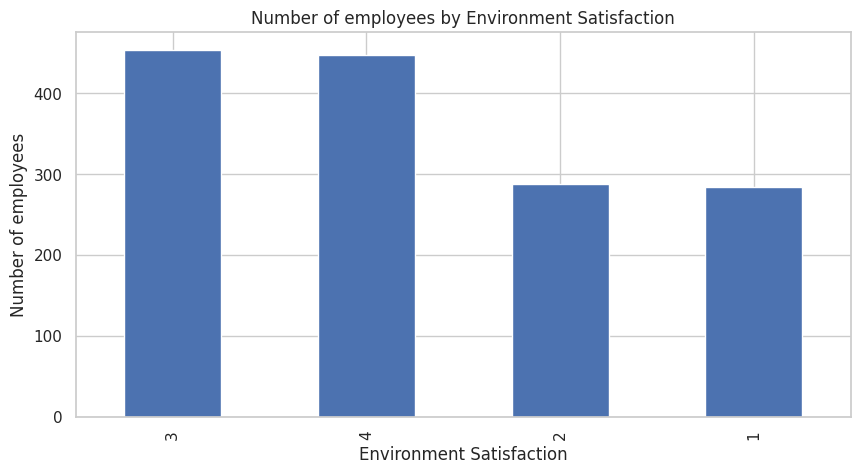

In [ ]:
df.EnvironmentSatisfaction.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of employees by Environment Satisfaction")
plt.ylabel('Number of employees')
plt.xlabel('Environment Satisfaction')
plt.show()

<ipython-input-106-a89e3b3c8399>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='EnvironmentSatisfaction', y='Attrition', orient='h', errwidth=0, data=df)


<Axes: xlabel='EnvironmentSatisfaction', ylabel='Attrition'>

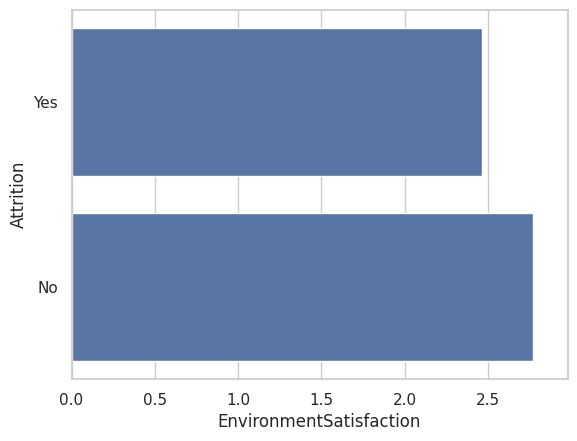

In [ ]:
sns.barplot(x='EnvironmentSatisfaction', y='Attrition', orient='h', errwidth=0, data=df)

업무에 대한 만족도의 경우 전체 직원둘 모두 높은 만족도를 가지고 있으며, 퇴사여부를 비교했을 때도 큰 차이가 없어 업무에 대한 만족도는 퇴사에 영향을 미친다고 보기 어렵습니다.

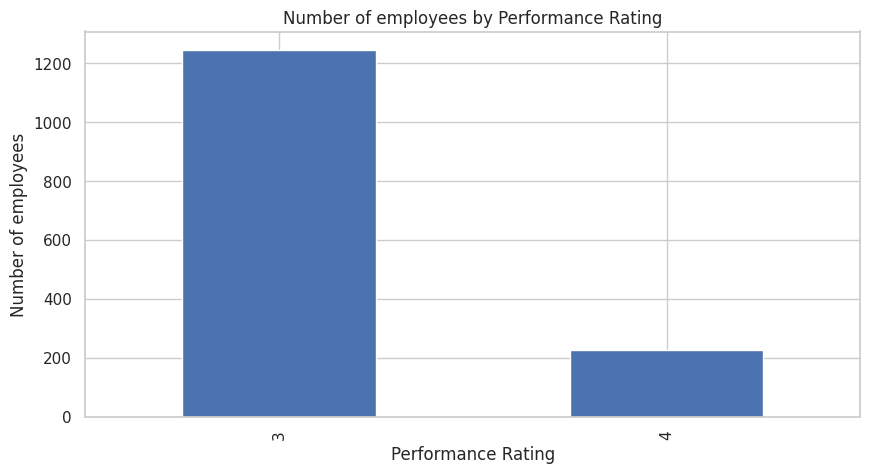

In [ ]:
df.PerformanceRating.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of employees by Performance Rating")
plt.ylabel('Number of employees')
plt.xlabel('Performance Rating')
plt.show()

<ipython-input-108-e0fe27c571df>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='PerformanceRating', y='Attrition', orient='h', errwidth=0, data=df)


<Axes: xlabel='PerformanceRating', ylabel='Attrition'>

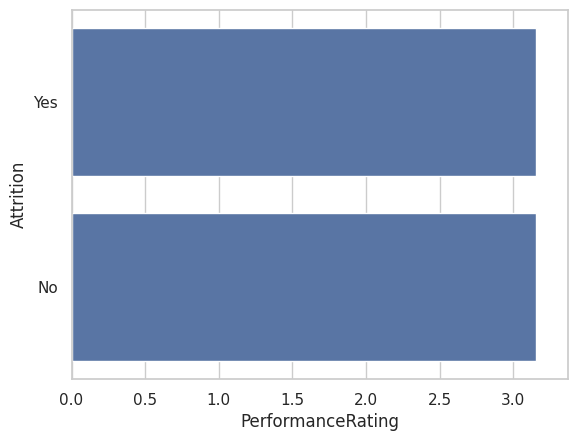

In [ ]:
sns.barplot(x='PerformanceRating', y='Attrition', orient='h', errwidth=0, data=df)

업무 성과에 대해 비교했을 경우, 전체 직원의 대다수가 3 'Excellent' 를 받았으며, 약 250명의 직원이 4'Outstanding'을 받았습니다. 하지만 3 이하로 내려간 직원은 없습니다.
또한 퇴직 여부로 비교하였을 때도 동일한 값을 기록하였기 때문에 퇴직 여부에 업무성과가 영향을 주진 않는 것으로 보입니다.

<ipython-input-109-17271e0c0bc9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


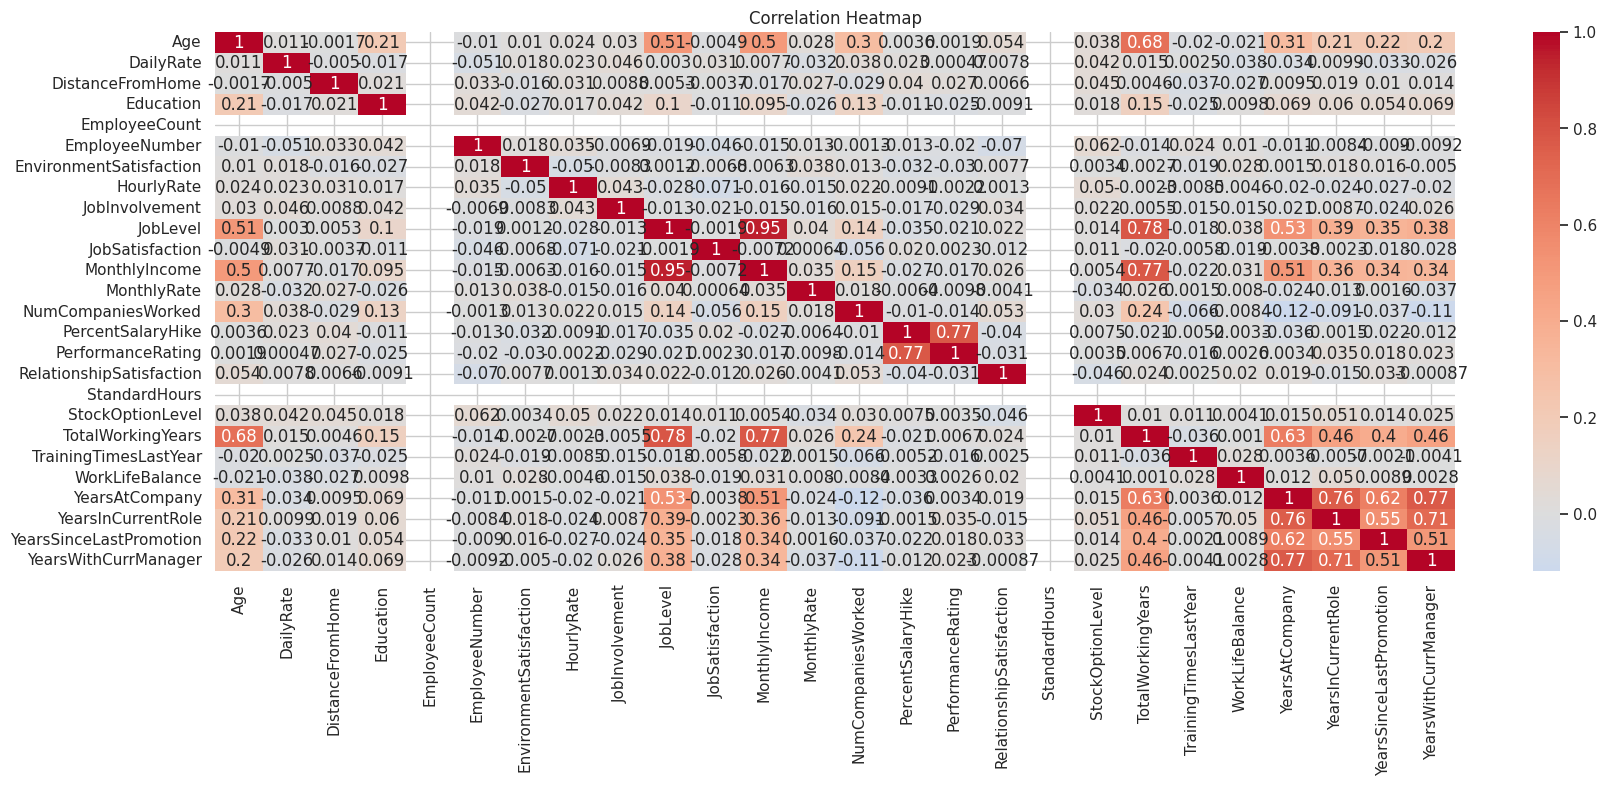

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0)
plt.title('Correlation Heatmap')
plt.show()

퇴직 여부에서 Yes 와 No 로 대답을 하였기 때문에 두 가지 대답을 그룹별로 나누어서 각각의 독립변수들의 상관관계 분석하는 것이 좋을 것으로 고려하였습니다.
고려한 이유는 다음과 같습니다.

1. 데이터 유형에서 볼수 있듯이 퇴직여부는 문자형이기 때문에 숫자형만을 분석하는 상관관계 적용이 불가능함
2. 퇴직을 촉발하는 주요 요인을 알기 위해서는 그룹별로 나누어서 상관관계 분석하는 것이 어떤 특성들이 가장 영향을 미쳤는지 쉽게 알 수 있음

상관관계 분석은 1에 가까울수록 강한 양의 상관관계를 가지며, -1에 가까울수록 강한 음의 상관관계를 가집니다. 0에 가까울 경우 상관관계가 약하거나 없다는 것을 의미합니다.

부호의 의미는 양(+)일 경우 두 변수가 함께 증가 혹은 감소함을 의미하며, 음(-)일 경우 한 변수가 증가하면 다른 변수가 감소한다는 것을 나타냅니다.


In [ ]:
group=df.groupby(['Attrition'])
group.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3


In [ ]:
group.groups

{'No': [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 103, 104, 105, 106, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, ...], 'Yes': [0, 2, 14, 21, 24, 26, 33, 34, 36, 42, 45, 50, 51, 69, 89, 100, 102, 107, 111, 122, 124, 126, 127, 132, 136, 140, 171, 177, 182, 192, 204, 205, 210, 214, 216, 217, 229, 234, 236, 239, 250, 259, 264, 271, 286, 288, 293, 296, 317, 323, 327, 336, 357, 363, 366, 368, 370, 378, 382, 385, 405, 414, 415, 421, 422, 435, 436, 439, 440, 443, 453, 457, 463, 469, 479, 480, 482, 495, 504, 513, 514, 525, 528, 540, 547, 562, 566, 568, 573, 585, 589, 591, 595, 598, 607, 608, 614, 636, 645, 656, ...]}

In [ ]:
df.groupby('Attrition').get_group('Yes')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,Male,33,3,1,Sales Representative,1,Married,1790,26956,1,Y,No,19,3,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,1,Male,36,3,1,Research Scientist,4,Married,4787,26124,9,Y,Yes,14,3,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,4,Male,72,3,1,Laboratory Technician,3,Married,2339,3666,8,Y,No,11,3,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,2,Male,94,3,2,Sales Executive,3,Divorced,6728,14255,7,Y,No,12,3,4,80,2,12,3,3,6,3,0,1


In [ ]:
df.groupby('Attrition').get_group('No')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
group.corr()

<ipython-input-114-540bcdc89da2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group.corr()


Age  DailyRate  DistanceFromHome  \
Attrition                                                                   
No        Age                       1.000000   0.000007          0.005828   
          DailyRate                 0.000007   1.000000          0.015425   
          DistanceFromHome          0.005828   0.015425          1.000000   
          Education                 0.208739  -0.013103          0.019373   
          EmployeeCount                  NaN        NaN               NaN   
          EmployeeNumber           -0.024071  -0.053613          0.029550   
          EnvironmentSatisfaction  -0.001000   0.019345         -0.014166   
          HourlyRate                0.005158   0.012215          0.040857   
          JobInvolvement           -0.005037   0.040008          0.014510   
          JobLevel                  0.497797  -0.010678          0.007809   
          JobSatisfaction          -0.033143   0.028742          0.015008   
          MonthlyIncome             0.486713  -0.004482         -0.011321   
          MonthlyRate               0.052284  -0.011258          0.028762   
          NumCompaniesWorked        0.301987   0.030215         -0.013295   
          PercentSalaryHike         0.006324   0.035506          0.021266   
          PerformanceRating         0.009863   0.002914          0.011508   
          RelationshipSatisfaction  0.028981   0.018157          0.003340   
          StandardHours                  NaN        NaN               NaN   
          StockOptionLevel         -0.012452   0.048172          0.062549   
          TotalWorkingYears         0.672753   0.005735          0.020947   
          TrainingTimesLastYear    -0.024100   0.001945         -0.030805   
          WorkLifeBalance          -0.021222  -0.057386         -0.012445   
          YearsAtCompany            0.264745  -0.036447          0.029983   
          YearsInCurrentRole        0.158121   0.006929          0.044839   
          YearsSinceLastPromotion   0.190892  -0.029210          0.016516   
          YearsWithCurrManager      0.154146  -0.038031          0.033575   
Yes       Age                       1.000000   0.009640          0.033881   
          DailyRate                 0.009640   1.000000         -0.080002   
          DistanceFromHome          0.033881  -0.080002          1.000000   
          Education                 0.192184  -0.048073          0.044774   
          EmployeeCount                  NaN        NaN               NaN   
          EmployeeNumber            0.048357  -0.041120          0.056168   
          EnvironmentSatisfaction  -0.030219  -0.019782          0.019447   
          HourlyRate                0.112644   0.080470         -0.013819   
          JobInvolvement            0.070830   0.035421          0.039637   
          JobLevel                  0.500386   0.017825          0.083905   
          JobSatisfaction           0.031509   0.005118         -0.046744   
          MonthlyIncome             0.500602   0.020175          0.038948   
          MonthlyRate              -0.070142  -0.135200          0.014747   
          NumCompaniesWorked        0.349638   0.091391         -0.121304   
          PercentSalaryHike        -0.020759  -0.046404          0.137674   
          PerformanceRating        -0.033040  -0.011172          0.102790   
          RelationshipSatisfaction  0.128509  -0.059042          0.042372   
          StandardHours                  NaN        NaN               NaN   
          StockOptionLevel          0.150161  -0.034317          0.025690   
          TotalWorkingYears         0.672621   0.000203          0.004146   
          TrainingTimesLastYear    -0.056433  -0.016391         -0.041019   
          WorkLifeBalance          -0.075944   0.026762         -0.060009   
          YearsAtCompany            0.452909  -0.072555         -0.029204   
          YearsInCurrentRole        0.384303  -0.035748         -0.041440   
          YearsSinceLastPromotion   0

상관관계 분석을 했을 때 퇴직한 사람('yes')을 보면 집과의 거리(DistanceFromHome)는 급여의 증가분 백분율(PercentSalaryHike)와 0.137674, 월소득(MonthlyIncome)은 업무의 수준(Joblevel)과 0.945540	, 업무환경에 대한 만족도(EnvironmentSatisfaction)는 마지막 프로모션(YearsSinceLastPromotion)과 0.104580, 업무성과(PerformanceRating)는 급여의 증가분 백분율(PercentSalaryHike)과 0.795337의 강한 상관관계를 가지고 있었습니다.

하지만 상관관계 분석을 하였어도 독립변수가 종속변수인 퇴직에 영향을 준다는 인과관계를 결정할 수 없기 때문에 추가적으로 로지스틱회귀를 이용하여 분석하였습니다.

종속변수가 yes, no 라는 이진형 변수이기 때문에 연속형 변수를 측정해야 하는 선형회귀를 사용하지 못합니다. 따라서 이진형 변수를 적용시킬 수 있는 로지스틱회귀를 이용해 분석하였습니다.


In [ ]:
df.Attrition.replace(['Yes','No'],[0,1],inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,1,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [ ]:
# Split the data into training and testing sets
X = df[['DistanceFromHome','MonthlyIncome','EnvironmentSatisfaction','PerformanceRating']]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

로지스틱회귀 모델의 독립변수로서 집과의거리, 월소득, 업무환경에 대한 만족도, 업무성과를 사용하였으며, 종속변수로서 퇴사여부를 사용하였습니다. 결과적으로 로지스틱회귀 예측모델의 정확도는 0.66이 나왔습니다.

마지막 auc score는 0에서 1까지 값을 구할 수 있으며, 0.5점은 무작위 추측보다는 괜찮은 모델이라는 것을 말하고 1점이 되면 종속변수를 완벽하게 구분 가능한 모델이라는 것을 의미합니다.

로지스틱회귀 예측모델과 유사한 랜덤포레스트를 이용했습니다.
랜덤포레스트에서의 auc score는 0.57이 나왔습니다.

둘 다 0.5 이상은 되기 때문에 무작위 추측보다는 나은 모델이라고 할 수 있지만, 유사해 보입니다.
그래서 어떤 모델이 좋은 모델인지 판단하는데 사용되는 ROC 곡선을 그려봤습니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg= LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

Accuracy: 0.8616780045351474
Confusion Matrix:
 [[  0  61]
 [  0 380]]
AUC Score: 0.6574201898188092


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix )

fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

Accuracy: 0.8231292517006803
Confusion Matrix:
 [[  6  55]
 [ 23 357]]
AUC Score: 0.5741803278688524


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


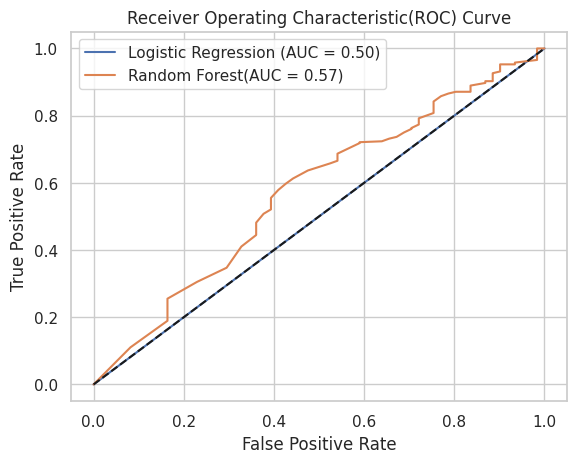

Logistic Regression accuracy: 0.86
Random Forest accuracy: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
logreg_preds = logreg.predict_proba(X_test)[:,1]
rfc_preds = rfc.predict_proba(X_test)[:,1]

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_preds)
logreg_auc = auc(logreg_fpr, logreg_tpr)

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_preds)
rfc_auc = auc(rfc_fpr, rfc_tpr)

plt. plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt. plot(rfc_fpr, rfc_tpr, label=f'Random Forest(AUC = {rfc_auc:.2f})')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend()
plt.show()

logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))

print(f'Logistic Regression accuracy: {logreg_acc:.2f}')
print(f'Random Forest accuracy: {rfc_acc:.2f}')

두 모델의 정확도를 비교했을 때 로지스틱 모델의 정확도가 0.86으로 약간 더 높게 나타났습니다만 auc 크기는 유사합니다. 하지만 랜던포레스트가 더 높은 것을 볼 수 있습니다. 랜덤포레스트 모델 성능이 더 뛰어난 것으로 보입니다.

또한 랜덤포레스트 모델을 이용해 변수 중요도를 추출하였으며, 월소득>집과의 거리>업무환경에 대한 만족도>업무 성과 순으로 영향력이 큰 것을 알 수 있었습니다.

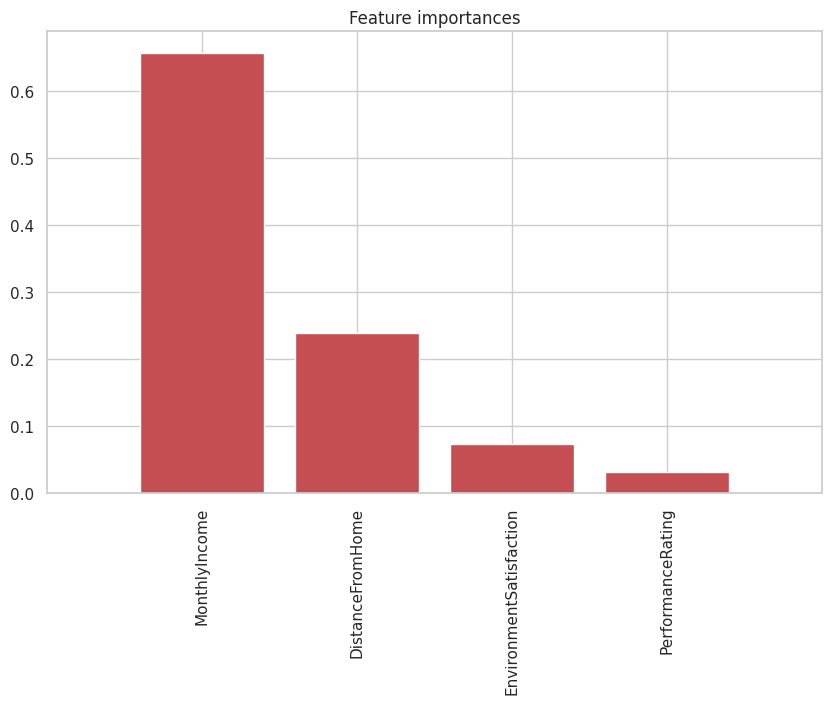

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
X = df[['DistanceFromHome','MonthlyIncome','EnvironmentSatisfaction','PerformanceRating']]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# **2. 추가요인 분석**

앞서 상관관계 분석을 했을 때 퇴직한 사람('yes')을 보면 근속연수(YearsAtCompany)와 현재역할의 연수(YearsInCurrentRole)의 간 값이 0.810889로 가장 강한 상관관계를 가지고 있었습니다. 다음으로 현재 관리자와 함께 보낸 시간(YearsWithCurrManager)과 현재역할의 연수(YearsInCurrentRole) 간 값이 0.781087로 강한 상관관계를 가지고 있었습니다.

퇴직한 사람만을 대상으로 한 상관관계 분석이기 때문에 중요한 요인이라고 보고 공통되는 현재역할의 연수를 중심으로 근속연수와 현재관리자와 함께 보낸 시간 3가지를 앞서 수행한 것처럼 인과관계를 결정하고자 로지스틱회귀와 랜덤포레스트를 이용하여 분석하였습니다.

In [ ]:
# Split the data into training and testing sets
X = df[['YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager']]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

로지스틱회귀 모델의 독립변수로서 근속연수, 현재역할의 연수, 현재 관리자와 함께 보낸 시간을 사용하였으며, 종속변수로서 퇴사여부를 사용하였습니다. 결과적으로 로지스틱회귀 예측모델의 정확도는 약 0.60이 나왔습니다.

로지스틱회귀 예측모델과 유사한 랜덤포레스트를 이용했습니다. 랜덤포레스트에서의 auc score는 0.57이 나왔습니다.

둘 다 0.5 이상은 되기 때문에 무작위 추측보다는 나은 모델이라고 할 수 있지만, 로지스틱회귀 예측모델이 조금 정확도가 높게 나타났습니다. 하지만 어떤 모델이 좋은 모델인지 판단가능한 ROC 곡선을 그렸습니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg= LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

Accuracy: 0.8616780045351474
Confusion Matrix:
 [[  0  61]
 [  0 380]]
AUC Score: 0.5974547023295945


In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix )

fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

Accuracy: 0.8435374149659864
Confusion Matrix:
 [[  0  61]
 [  8 372]]
AUC Score: 0.5695858498705781


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


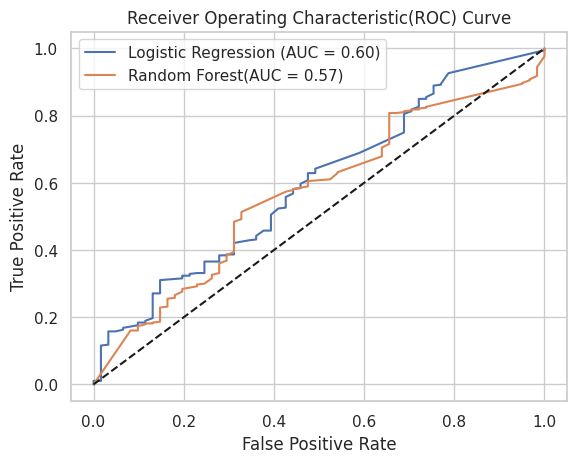

Logistic Regression accuracy: 0.86
Random Forest accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
logreg_preds = logreg.predict_proba(X_test)[:,1]
rfc_preds = rfc.predict_proba(X_test)[:,1]

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_preds)
logreg_auc = auc(logreg_fpr, logreg_tpr)

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_preds)
rfc_auc = auc(rfc_fpr, rfc_tpr)

plt. plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt. plot(rfc_fpr, rfc_tpr, label=f'Random Forest(AUC = {rfc_auc:.2f})')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend()
plt.show()

logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))

print(f'Logistic Regression accuracy: {logreg_acc:.2f}')
print(f'Random Forest accuracy: {rfc_acc:.2f}')

두 모델의 정확도를 비교했을 때 로지스틱 모델의 정확도가 0.86으로 0.84인 랜덤포레스트보다 약간 더 높게 나타났습니다만 auc 면적의 크기는 랜던포레스트가 더 큰것으로 보입니다. 따라서 랜덤포레스트 모델 성능이 더 뛰어난 것으로 보입니다.

또한 랜덤포레스트 모델을 이용해 변수 중요도를 추출하였습니다. 근속연수>현재 역할의 년수>현재 관리자와 함께 보낸 시간 순으로 영향력이 큰 것을 알 수 있었습니다.

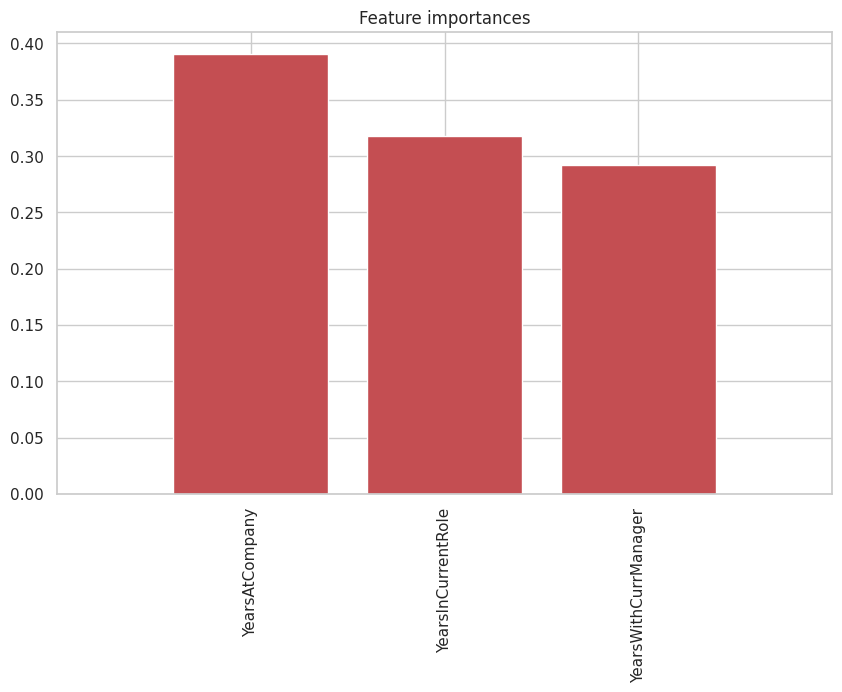

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
X = df[['YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager']]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Split the data into training and testing sets
X = df[['YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager','DistanceFromHome','MonthlyIncome','EnvironmentSatisfaction','PerformanceRating','PercentSalaryHike']]
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg= LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

Accuracy: 0.8616780045351474
Confusion Matrix:
 [[  0  61]
 [  0 380]]
AUC Score: 0.6742018981880932


In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix )

fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

Accuracy: 0.8412698412698413
Confusion Matrix:
 [[  9  52]
 [ 18 362]]
AUC Score: 0.6269197584124245


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


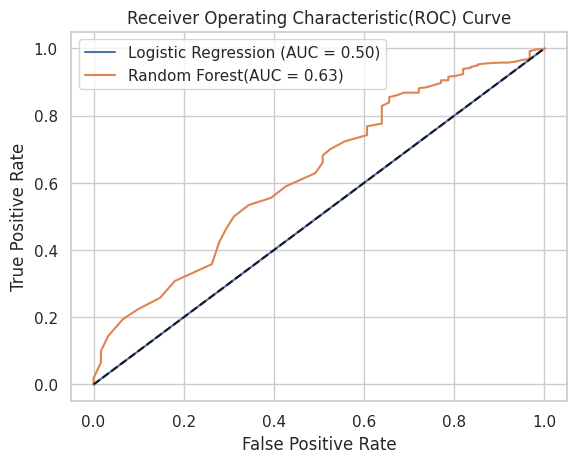

Logistic Regression accuracy: 0.86
Random Forest accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
logreg_preds = logreg.predict_proba(X_test)[:,1]
rfc_preds = rfc.predict_proba(X_test)[:,1]

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_preds)
logreg_auc = auc(logreg_fpr, logreg_tpr)

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_preds)
rfc_auc = auc(rfc_fpr, rfc_tpr)

plt. plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt. plot(rfc_fpr, rfc_tpr, label=f'Random Forest(AUC = {rfc_auc:.2f})')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend()
plt.show()

logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))

print(f'Logistic Regression accuracy: {logreg_acc:.2f}')
print(f'Random Forest accuracy: {rfc_acc:.2f}')

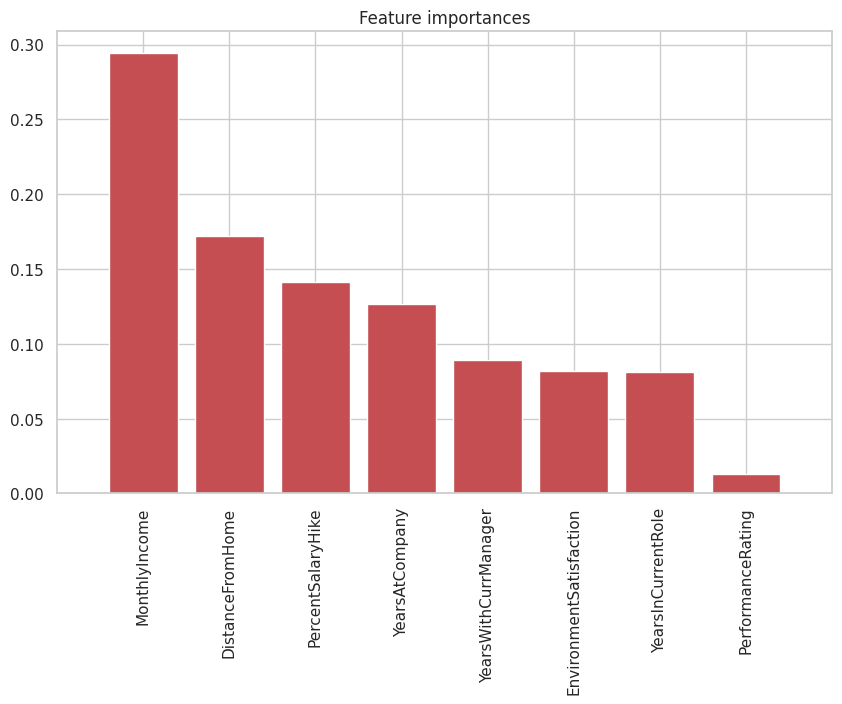

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
X = df[['YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager','DistanceFromHome','MonthlyIncome','EnvironmentSatisfaction','PerformanceRating','PercentSalaryHike']]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()